# Examining the crossmatches in more detail.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.coordinates import FK5
from astropy.coordinates import ICRS
import astropy.coordinates as coord
from astropy.table import Table

plotpar = {'axes.labelsize': 30,
                  'font.size': 22,
                  'legend.fontsize': 15,
                  'xtick.labelsize': 30,
                  'ytick.labelsize': 30,
                  'text.usetex': True}
plt.rcParams.update(plotpar)

First, let's look at the Kepler-Gaia crossmatch.

In [88]:
with fits.open("../../data/kepler_edr3_1arcsec.fits") as data:
    gaia3 = pd.DataFrame(data[1].data, dtype="float64")

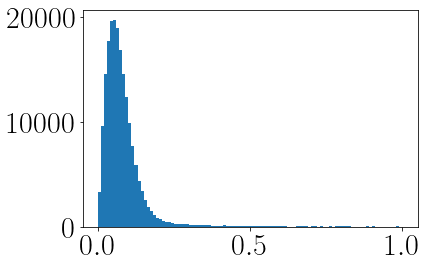

In [89]:
plt.hist(gaia3.kepler_gaia_ang_dist, 100);

Now the APOGEE crossmatch

In [92]:
# tbl = Table.read("../data/apogee_dr16_tmass_edr3_xmatch_2.fits", format='fits')
tbl = Table.read("../data/apogee_dr16_tmass_psc_edr3_xmatch.fits", format='fits')
names = [name for name in tbl.colnames if len(tbl[name].shape) <= 1]
apo3 = tbl[names].to_pandas()

In [95]:
for k in apo3.keys():
    print(k)

col1
original_ext_source_id
dr2_source_id
dr3_source_id
angular_distance
magnitude_difference
proper_motion_propagation
solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pm
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
nu_eff_used_in_astrometry
pseudocolour
pseudocolour_error
ra_pseudocolour_corr
dec_pseudocolour_corr
parallax_pseudocolour_corr
pmra_pseudocolour_corr
pmdec_pseudocolour_corr
astrometric_matched_transits
visibility_periods_used
astrometric_sigma5d_max
matched_transits
new_matched_transits
matched_transits_removed
ipd_go

In [92]:
tbl = Table.read("../data/apogeedr16_stars.fits", format='fits')
names = [name for name in tbl.colnames if len(tbl[name].shape) <= 1]
apo2 = tbl[names].to_pandas()

apo23 = pd.merge(apo2, apo3, how="left", left_on="GAIA_SOURCE_ID", right_on="dr2_source_id")

(22, 3)

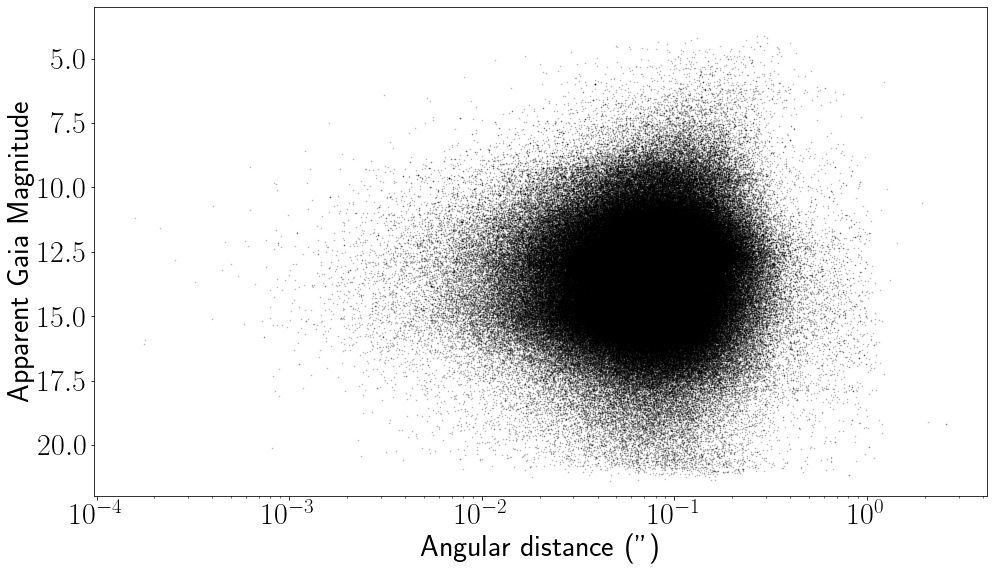

In [96]:
plt.figure(figsize=(16, 9))
plt.plot(apo23.tmass_edr3_angular_distance, apo23.GAIA_PHOT_G_MEAN_MAG, "k.", ms=3, alpha=.3, mec="none")
# plt.axhline(13)
plt.xscale("log")
plt.xlabel("Angular distance ('')")
plt.ylabel("Apparent Gaia Magnitude")
plt.ylim(22, 3)

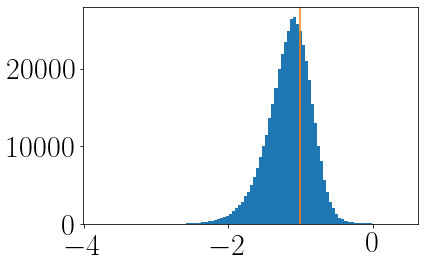

In [100]:
plt.hist(np.log10(apo23.tmass_edr3_angular_distance), 100);
plt.axvline(-1, color="C1")

In [101]:
mgood = (apo23.apo23.tmass_edr3_angular_distance.values < .1)
print(len(apo23), sum(mgood))

AttributeError: 'DataFrame' object has no attribute 'apo23'

442672 211462


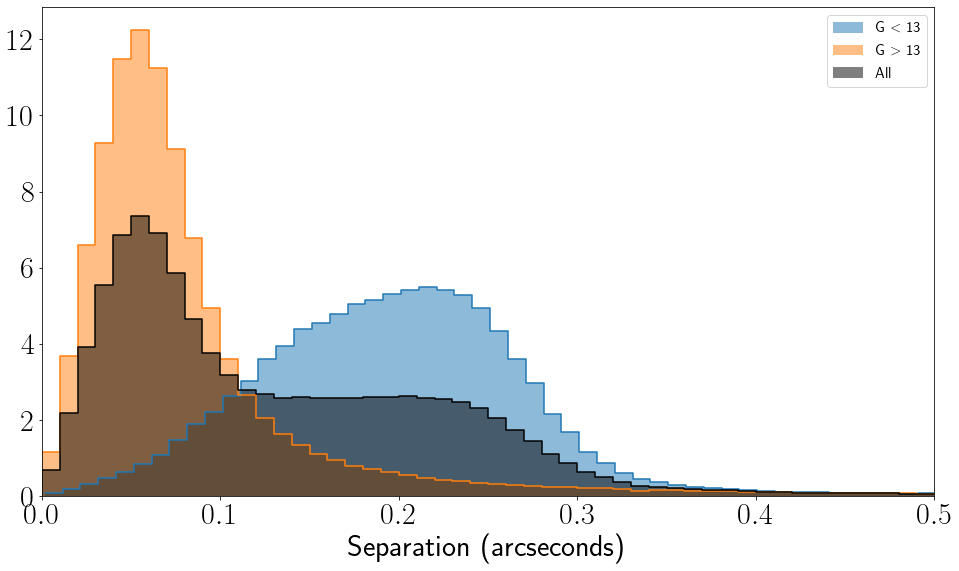

In [76]:
plt.figure(figsize=(16, 9))
m = apo23.angular_distance.values < 1.
m01 = apo23.angular_distance.values < .1
m_bright = (apo23.GAIA_PHOT_G_MEAN_MAG.values < 13) & (apo23.angular_distance.values < 1.)
m_faint = (apo23.GAIA_PHOT_G_MEAN_MAG.values > 13) & (apo23.angular_distance.values < 1.)
h = plt.hist(apo23.angular_distance.values[m_bright], 100, alpha=.5, density=True, label="G $<$ 13");
plt.step(h[1][:-1], h[0], color="C0", where="post")
h = plt.hist(apo23.angular_distance.values[m_faint], 100, alpha=.5, density=True, label="G $>$ 13", color="C1");
plt.step(h[1][:-1], h[0], color="C1", where="post")
h = plt.hist(apo23.angular_distance.values[m], 100, alpha=.5, density=True, label="All", color="k");
plt.step(h[1][:-1], h[0], color="k", where="post")
plt.legend()
# plt.axvline(0.1, color="C3")
plt.xlabel("Separation (arcseconds)")
plt.xlim(0, .5)
print(sum(m), sum(m01))

(-2.5, 0.5)

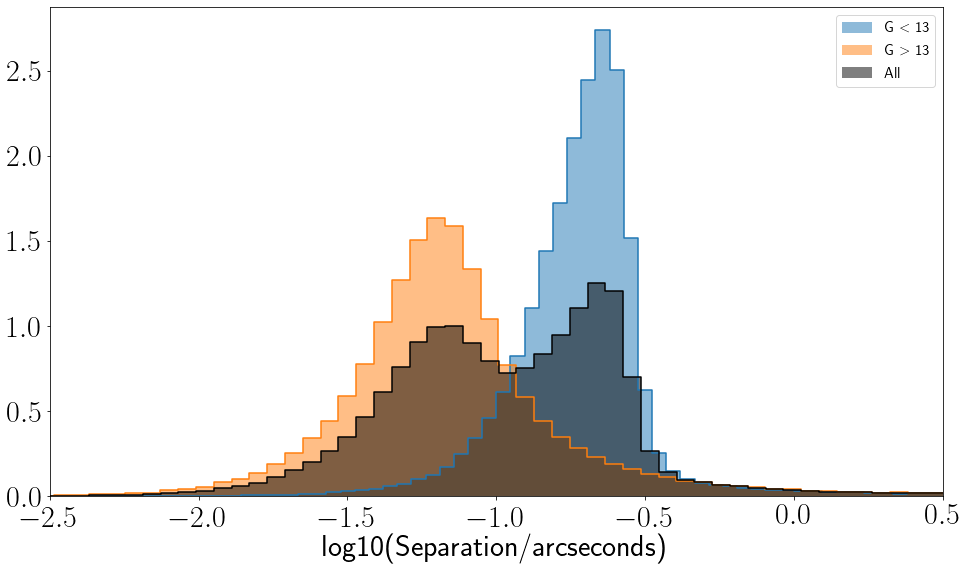

In [80]:
plt.figure(figsize=(16, 9))
m = apo23.angular_distance.values < 1.
m01 = apo23.angular_distance.values < .1
m_bright = (apo23.GAIA_PHOT_G_MEAN_MAG.values < 13)
m_faint = (apo23.GAIA_PHOT_G_MEAN_MAG.values > 13)
h = plt.hist(np.log10(apo23.angular_distance.values[m_bright]), 100, alpha=.5, density=True, label="G $<$ 13");
plt.step(h[1][:-1], h[0], color="C0", where="post")
h = plt.hist(np.log10(apo23.angular_distance.values[m_faint]), 100, alpha=.5, density=True, label="G $>$ 13", color="C1");
plt.step(h[1][:-1], h[0], color="C1", where="post")
h = plt.hist(np.log10(apo23.angular_distance.values), 100, alpha=.5, density=True, label="All", color="k");
plt.step(h[1][:-1], h[0], color="k", where="post")
plt.legend()
# plt.axvline(0.1, color="C3")
plt.xlabel("log10(Separation/arcseconds)")
plt.xlim(-2.5, .5)

In [6]:
print(sum(np.isfinite(apo23.pmra.values[~m01])), len(apo23.pmra.values[~m01]))
print(sum(apo23.pmra.values[~m01]!=0), len(apo23.pmra.values[~m01]))
print(sum(np.isfinite(apo23.pmra.values[m01])), len(apo23.pmra.values[m01]))

245026 261845
261845 261845
211462 211462


In [7]:
print(sum(apo23.angular_distance.values < .15), len(apo23.angular_distance.values))

272804 473307


(-0.5, 5)

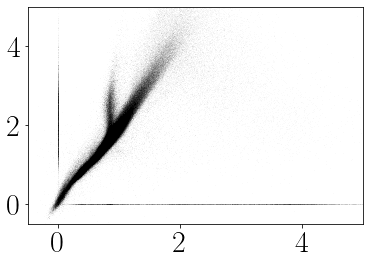

In [8]:
# apo23 = apo23.iloc[(apo23.J.values > -5000) & (apo23.GAIA_PHOT_G_MEAN_MAG.values > -5000)]
plt.plot(apo23.J-apo23.K, apo23.GAIA_PHOT_BP_MEAN_MAG-apo23.GAIA_PHOT_RP_MEAN_MAG,
         "k.", rasterized=True, alpha=.1, mec="none", ms=1)
plt.ylim(-.5, 5)
plt.xlim(-.5, 5)

(22, 3)

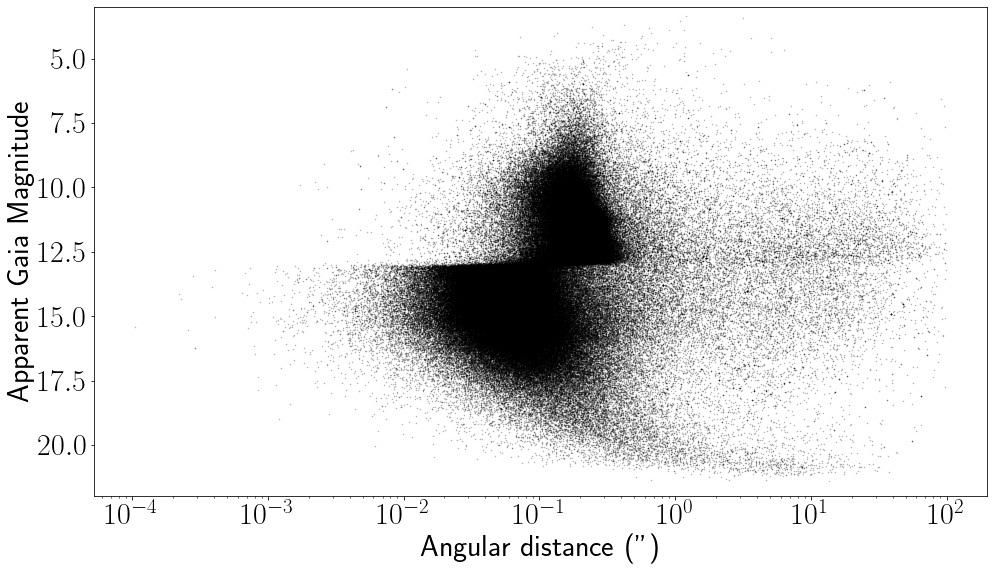

In [87]:
plt.figure(figsize=(16, 9))
plt.plot(apo23.angular_distance, apo23.GAIA_PHOT_G_MEAN_MAG, "k.", ms=3, alpha=.3, mec="none")
# plt.axhline(13)
plt.xscale("log")
plt.xlabel("Angular distance ('')")
plt.ylabel("Apparent Gaia Magnitude")
plt.ylim(22, 3)

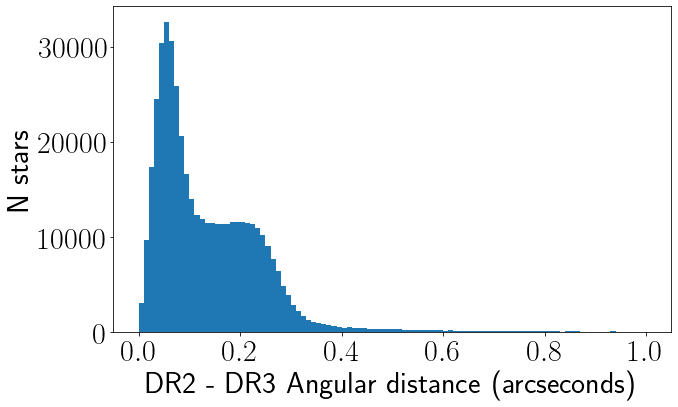

In [85]:
plt.figure(figsize=(10, 6))
plt.hist(apo23.angular_distance.values[apo23.angular_distance.values < 1.], 100);
plt.xlabel("DR2 - DR3 Angular distance (arcseconds)")
plt.ylabel("N stars");

Text(0, 0.5, 'BP-RP')

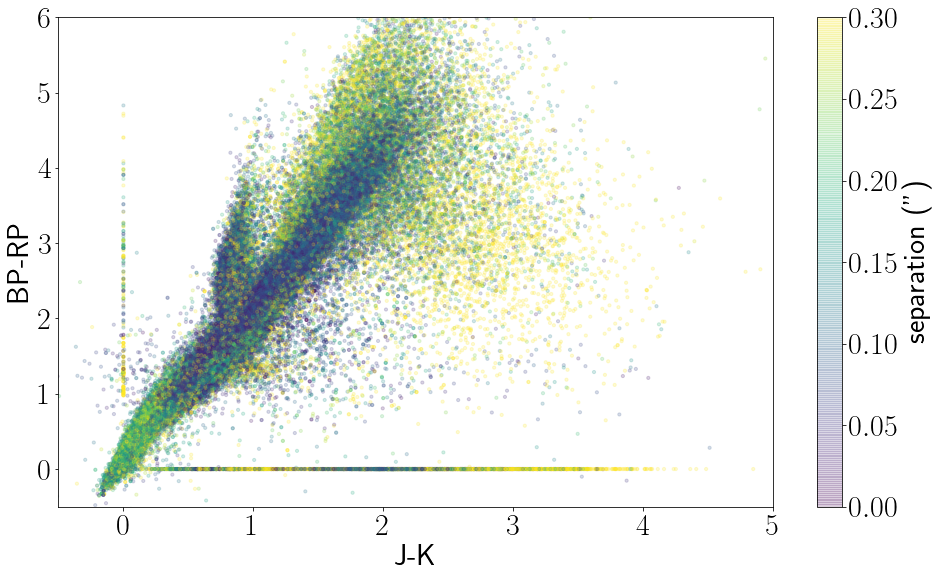

In [9]:
plt.figure(figsize=(16, 9))
plt.scatter(apo23.J-apo23.K, apo23.GAIA_PHOT_BP_MEAN_MAG-apo23.GAIA_PHOT_RP_MEAN_MAG,
            c=apo23.angular_distance,  # c=abs(apo23.dr2_radial_velocity-apo23.OBSVHELIO_AVG)/apo23.dr2_radial_velocity_error, #
            vmin=0, vmax=.3, #vmin=0., vmax=.3,
            rasterized=True, alpha=.2, s=10)
plt.ylim(-.5, 6)
plt.xlim(-.5, 5)
plt.colorbar(label="separation ('')")
plt.xlabel("J-K")
plt.ylabel("BP-RP")

In [ ]:
plt.figure(figsize=(16, 9))
plt.scatter(apo23.J-apo23.K, apo23.GAIA_PHOT_BP_MEAN_MAG-apo23.GAIA_PHOT_RP_MEAN_MAG,
            c=apo23.angular_distance,  # c=abs(apo23.dr2_radial_velocity-apo23.OBSVHELIO_AVG)/apo23.dr2_radial_velocity_error, #
            vmin=0, vmax=.3, #vmin=0., vmax=.3,
            rasterized=True, alpha=.2, s=10)
plt.ylim(-.5, 6)
plt.xlim(-.5, 5)
plt.colorbar(label="separation ('')")
plt.xlabel("J-K")
plt.ylabel("BP-RP")

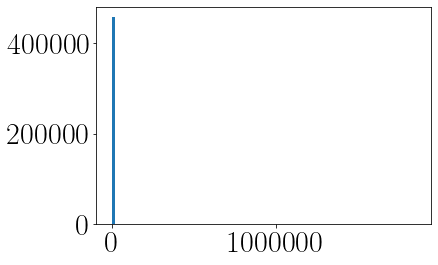

In [54]:
plt.hist(abs(apo23.dr2_radial_velocity-apo23.OBSVHELIO_AVG)/apo23.dr2_radial_velocity_error, 100);

(-0.5, 5)

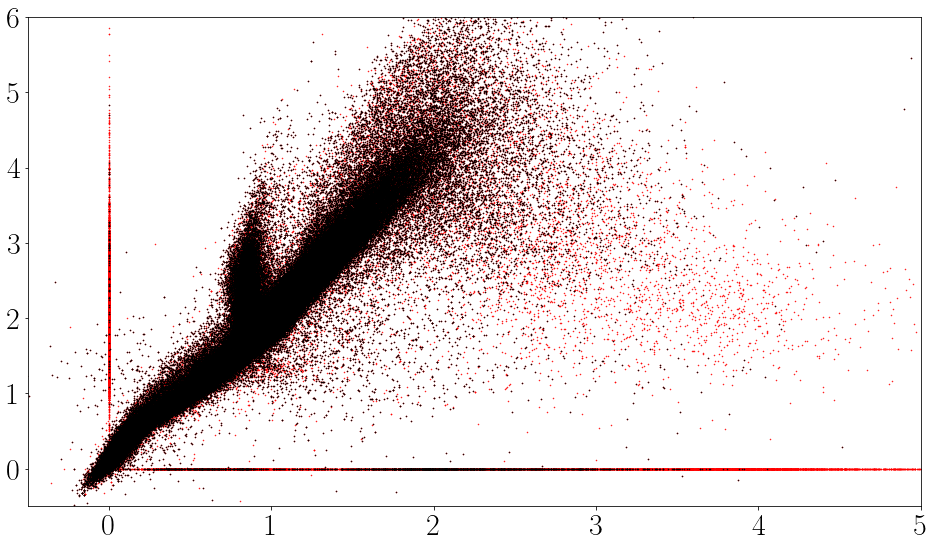

In [35]:
plt.figure(figsize=(16, 9))
m = apo23.angular_distance.values < .4
plt.plot(apo23.J-apo23.K, apo23.GAIA_PHOT_BP_MEAN_MAG-apo23.GAIA_PHOT_RP_MEAN_MAG, "r.", rasterized=True, ms=1)
plt.plot(apo23.J.values[m]-apo23.K.values[m], apo23.GAIA_PHOT_BP_MEAN_MAG.values[m]-apo23.GAIA_PHOT_RP_MEAN_MAG.values[m],
         "k.", rasterized=True, ms=1)
plt.ylim(-.5, 6)
plt.xlim(-.5, 5)

(-10, 10)

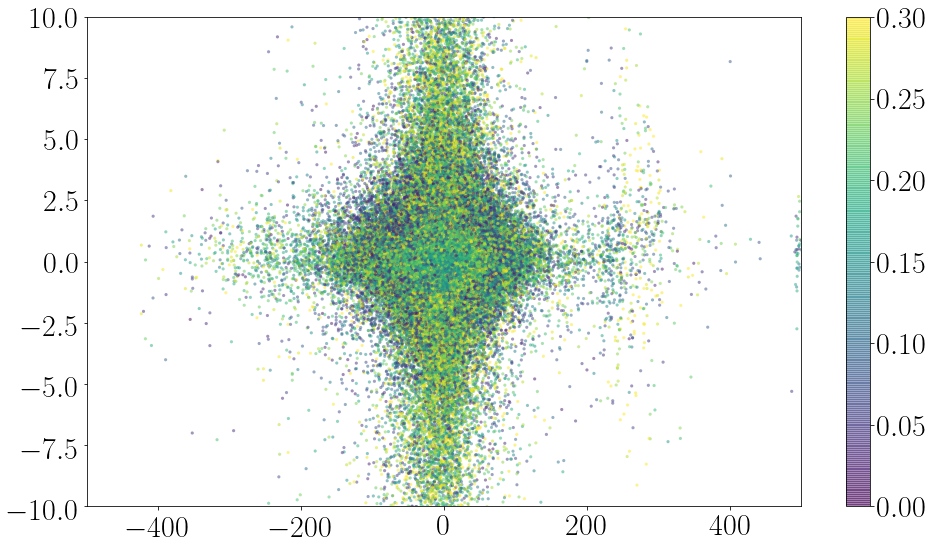

In [61]:
plt.figure(figsize=(16, 9))
# plt.errorbar(apo23.dr2_radial_velocity, apo23.dr2_radial_velocity-apo23.OBSVHELIO_AVG, yerr=apo23.dr2_radial_velocity_error,
#              fmt="k.", ms=1, alpha=.5)
plt.scatter(apo23.dr2_radial_velocity, apo23.dr2_radial_velocity-apo23.OBSVHELIO_AVG, c=apo23.angular_distance,
           vmin=0, vmax=.3, s=10, alpha=.5, edgecolor="none")
plt.colorbar()
plt.xlim(-500, 500)
plt.ylim(-10, 10)

In [10]:
for k in apo23.keys():
    print(k)

APOGEE_ID
TELESCOPE
FIELD
J
J_ERR
H
H_ERR
K
K_ERR
RA
DEC
GLON
GLAT
APOGEE_TARGET1
APOGEE_TARGET2
APOGEE_TARGET3
APOGEE2_TARGET1
APOGEE2_TARGET2
APOGEE2_TARGET3
TARGFLAGS
SURVEY
PROGRAMNAME
NVISITS
COMBTYPE
COMMISS
SNR
STARFLAG
STARFLAGS
ANDFLAG
ANDFLAGS
VHELIO_AVG
VSCATTER
VERR
VERR_MED
OBSVHELIO_AVG
OBSVSCATTER
OBSVERR
OBSVERR_MED
SYNTHVHELIO_AVG
SYNTHVSCATTER
SYNTHVERR
SYNTHVERR_MED
RV_TEFF
RV_LOGG
RV_FEH
RV_ALPHA
RV_CARB
RV_CCFWHM
RV_AUTOFWHM
SYNTHSCATTER
MEANFIB
SIGFIB
SNREV
APSTAR_VERSION
ASPCAP_VERSION
RESULTS_VERSION
EXTRATARG
MIN_H
MAX_H
MIN_JK
MAX_JK
TEFF
TEFF_ERR
LOGG
LOGG_ERR
VMICRO
VMACRO
VSINI
M_H
M_H_ERR
ALPHA_M
ALPHA_M_ERR
ASPCAP_CHI2
ASPCAP_CLASS
ASPCAPFLAG
ASPCAPFLAGS
C_FE
CI_FE
N_FE
O_FE
NA_FE
MG_FE
AL_FE
SI_FE
P_FE
S_FE
K_FE
CA_FE
TI_FE
TIII_FE
V_FE
CR_FE
MN_FE
FE_H
CO_FE
NI_FE
CU_FE
GE_FE
RB_FE
CE_FE
ND_FE
YB_FE
C_FE_ERR
CI_FE_ERR
N_FE_ERR
O_FE_ERR
NA_FE_ERR
MG_FE_ERR
AL_FE_ERR
SI_FE_ERR
P_FE_ERR
S_FE_ERR
K_FE_ERR
CA_FE_ERR
TI_FE_ERR
TIII_FE_ERR
V_FE_ERR
CR_FE_ERR
M